In [1]:
# import future python 3 functions
from __future__ import division, print_function, unicode_literals


#import common libraries
import numpy as np
import numpy.random as rnd
import os

In [2]:
# import plotting functions
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [6]:
# import SVM function and data sets
from sklearn import datasets
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier

#create a linearly seperable data set
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = iris["target"]

# grab sertosa or versicolor results only
SorV = (y == 0)|(y == 1)
X = X[SorV]
y = y[SorV]


In [30]:
# Train the models
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
C = 1
m = 2 
linsvm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=C, loss="hinge"))
    ))

stdsvm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svc", SVC(C=C, kernel="linear"))
    ))

SGD_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("sgd", SGDClassifier(loss="hinge", alpha=1/(m*C)))
    ))

linsvm_clf.fit(X, y)
stdsvm_clf.fit(X, y)
SGD_clf.fit(X, y)

Pipeline(steps=((u'scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), (u'sgd', SGDClassifier(alpha=0.5, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss=u'hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False))))

In [31]:
def plot_decision_boundary(clf, xmin, xmax, colour):
    w = clf.coef_[0]
    b = clf.intercept_[0]

    x_space = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x_space - b/w[1]

    plt.plot(x_space, decision_boundary, colour, linewidth=2)

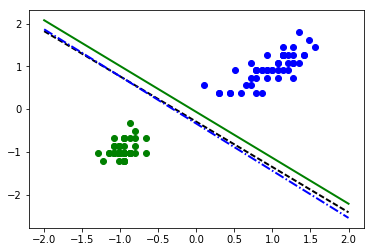

In [32]:
#plot the various models
plot_decision_boundary(linsvm_clf.named_steps['linear_svc'], -2, 2, "k--")
plot_decision_boundary(stdsvm_clf.named_steps['svc'], -2, 2, "b-.")
plot_decision_boundary(SGD_clf.named_steps['sgd'], -2, 2, "g-")
scaler = StandardScaler()
X = scaler.fit_transform(X)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "go")

In [39]:
# question 9
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:],

In [46]:
from sklearn.model_selection import StratifiedKFold
skfolds = StratifiedKFold(n_splits=10, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
svc_clf = SVC(C=1)
svc_clf.fit(X_train_scaled, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc_clf, X_test, y_test, cv=3, scoring="accuracy")

array([ 0.11354104,  0.11341134,  0.11354761])